In [1]:
import numpy as np
import pandas as pd

### --------------------------------Task 1--------------------------------#
###### Create a dataframe with three columns
###### Column 1: Team Names
###### Column 2: Total Matches played by each team
###### Column 3: Total Matches Won

In [2]:
match_Team=pd.read_excel('Team.xlsx')
team_name=pd.DataFrame(match_Team.Team_Name)
team_name

,Team_Name
0,Kolkata Knight Riders
1,Royal Challengers Bangalore
2,Chennai Super Kings
3,Kings XI Punjab
4,Rajasthan Royals
5,Delhi Daredevils
6,Mumbai Indians
7,Deccan Chargers
8,Kochi Tuskers Kerala
9,Pune Warriors


In [3]:
## Total matches played by each IPL Team

match=pd.read_excel('Match.xlsx')
home_match_count=match['Team_Name_Id'].value_counts()
home_match_count

2     78
3     74
6     69
4     65
1     62
7     62
5     52
8     39
11    30
10    23
13     9
9      7
12     7
Name: Team_Name_Id, dtype: int64

In [4]:
away_match_count=match['Opponent_Team_Id'].value_counts()
away_match_count

7     78
1     70
4     69
5     66
6     64
2     61
3     57
8     36
11    32
10    23
9      7
12     7
13     7
Name: Opponent_Team_Id, dtype: int64

In [5]:
tot_match_count=home_match_count+away_match_count
tot_match_count=tot_match_count.reset_index()
tot_match_count.columns=['Team_ID','Total_matches']
tot_match_count

,Team_ID,Total_matches
0,1,132
1,2,139
2,3,131
3,4,134
4,5,118
5,6,133
6,7,140
7,8,75
8,9,14
9,10,46


In [6]:
win_count=match['Match_Winner_Id'].value_counts().sort_index()
win_count=win_count.reset_index()
win_count.columns=['Team_ID','Total_matches']
win_count

,Team_ID,Total_matches
0,1.0,68
1,2.0,70
2,3.0,79
3,4.0,63
4,5.0,63
5,6.0,56
6,7.0,80
7,8.0,29
8,9.0,6
9,10.0,12


### --------------------------- TASK 2 --------------------------------#
##### Display the top 10 Runs scorer in the IPL
#### Display the top 10 batting performance in term of runs scored in the match

In [7]:
# Solution
balls=pd.read_excel('Ball_by_Ball.xlsx')
balls.head(2)


,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,,,,


In [8]:
runs=balls.groupby('Striker_Id')['Batsman_Scored'].sum().reset_index()
runs.head(10)

,Striker_Id,Batsman_Scored
0,1,1349
1,2,2435
2,3,91
3,4,1322
4,5,64
5,6,2170
6,7,130
7,8,4105
8,9,2427
9,10,971


In [9]:
runs.sort_values('Batsman_Scored',ascending=False).head(10)


,Striker_Id,Batsman_Scored
20,21,4106
7,8,4105
56,57,3874
39,40,3634
161,162,3447
45,46,3390
186,187,3373
109,110,3270
19,20,3270
41,42,3082


In [10]:
player=pd.read_excel('Player.xlsx')
player.head(2)
top_10_names=pd.merge(runs,player,left_on='Striker_Id',right_on='Player_Id',how='inner')[['Player_Name',"Batsman_Scored"]]
top_10_names

,Player_Name,Batsman_Scored
0,SC Ganguly,1349
1,BB McCullum,2435
2,RT Ponting,91
3,DJ Hussey,1322
4,Mohammad Hafeez,64
...,...,...
429,A Zampa,0
430,N Rana,104
431,S Kaushik,0
432,ER Dwivedi,24


In [11]:
top_10_names.sort_values('Batsman_Scored',ascending=False).head(10)

,Player_Name,Batsman_Scored
20,SK Raina,4106
7,V Kohli,4105
56,RG Sharma,3874
39,G Gambhir,3634
161,CH Gayle,3447
45,RV Uthappa,3390
186,DA Warner,3373
109,AB de Villiers,3270
19,MS Dhoni,3270
41,S Dhawan,3082


#### Task 2.1: Display Top 10 highest score in a match

In [12]:
balls.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index().sort_values('Batsman_Scored',ascending=False)

,Match_Id,Striker_Id,Batsman_Scored
5304,598032,162,175
1,335987,2,158
7532,829800,110,133
8367,980992,110,129
4692,548377,162,128
...,...,...,...
1979,419125,136,0
6963,829722,57,0
1985,419125,222,0
2003,419126,185,0


### ----------------------------TASK 3 ----------------------------------#
##### Display the Top 10 players interms of high strike rate 
###### (Note that a player must atleast scored 1000 runs to be in this list)

In [13]:
# Solution
balls=pd.read_excel('Ball_by_Ball.xlsx')
balls.head(1)

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,


In [14]:
# Solution
# batsman_score calculation
batsmans_score=pd.DataFrame(balls.groupby('Striker_Id').Batsman_Scored.sum())
batsmans_score=batsmans_score[batsmans_score['Batsman_Scored']>=1000]
batsmans_score_series=batsmans_score.squeeze(axis=1)#DF to series
#balls faced calculation
batsmans_score.reset_index(inplace=True)
top_strikers=pd.merge(batsmans_score,balls,how='left', on='Striker_Id')
balls_faced=top_strikers.groupby('Striker_Id').Ball_Id.count()
strike_rate=pd.DataFrame((batsmans_score_series/balls_faced)*100).round(2)
strike_rate.rename(columns={0:'Strike_Rate'},inplace=True)
strike_rate.sort_values('Strike_Rate',ascending=False, inplace=True)
strike_rate.reset_index(inplace=True)
strike_rate.rename(columns={'Striker_Id':'Player_Id'},inplace=True)
strike_rate=strike_rate.iloc[0:10,]
strike_rate=pd.merge(strike_rate,player,how='left', on='Player_Id')[['Player_Name','Strike_Rate']]
strike_rate

,Player_Name,Strike_Rate
0,V Sehwag,148.83
1,AB de Villiers,146.57
2,CH Gayle,146.06
3,YK Pathan,142.29
4,KA Pollard,141.96
5,DA Miller,140.55
6,DA Warner,138.24
7,SR Watson,136.60
8,MS Dhoni,135.18
9,SK Raina,134.23


### ----------------------------TASK 4 ----------------------------------#
##### Display the Top 10 players interms of wickets taken  

In [34]:
# Solution
# top 10 wicket takers
balls_temp=balls.copy()
balls_temp['Player_dissimal_Id'].replace(' ',0,inplace=True)
balls_temp=balls_temp[balls_temp['Player_dissimal_Id']>0]
top_bowlers=pd.DataFrame(balls_temp.groupby('Bowler_Id').Player_dissimal_Id.count()).sort_values('Player_dissimal_Id',ascending=False)
top_bowlers.reset_index(inplace=True)
top_bowlers.rename(columns={'Bowler_Id':'Player_Id','Player_dissimal_Id':'Wickets_Taken'},inplace=True)
top_bowlers=top_bowlers.iloc[0:10,]
top_10_wicketers=pd.merge(top_bowlers,player,how='left',on='Player_Id')[['Player_Name','Wickets_Taken']]
top_10_wicketers


,Player_Name,Wickets_Taken
0,SL Malinga,134
1,Harbhajan Singh,116
2,A Mishra,107
3,DJ Bravo,107
4,PP Chawla,106
5,A Nehra,92
6,R Vinay Kumar,90
7,SR Watson,87
8,Z Khan,86
9,R Ashwin,84


### ----------------------------TASK 5 ----------------------------------#

##### Display the Top 10 players interms of Economic Rate 

In [35]:
# Solution

# Economy rate= runs/over
#balls.info() -> to check datatypes of features. Bcs of ' ', Extra_Runs is object type.
# balls['Extra_Runs'].isnull().sum() -> returns the count of NaN value. Null value is different from no value.
# print(balls['Extra_Runs'].unique())# returns ' ' in this feature which needs to be replaced.
# runs_given
balls['Extra_Runs'].replace(' ',0,inplace=True)
runs_conceded=balls.groupby('Bowler_Id')['Batsman_Scored'].sum()+balls.groupby('Bowler_Id')['Extra_Runs'].sum()
# totall_balls_bowled
balls_bowled=balls.groupby('Bowler_Id').Ball_Id.count()
# economy_rate
high_economy_rate=pd.DataFrame((runs_conceded/balls_bowled)*6).rename(columns={0:'Bowler_Economy'}).sort_values('Bowler_Economy',ascending=False).reset_index().head(10)
low_economy_rate=pd.DataFrame((runs_conceded/balls_bowled)*6).rename(columns={0:'Bowler_Economy'}).sort_values('Bowler_Economy').reset_index().head(10)


# bolwers with high economy
ten_high_economy_bowler = pd.merge(high_economy_rate,player,left_on='Bowler_Id',right_on='Player_Id',how='left')[['Player_Name','Bowler_Economy']]
print(f'Bowlers with high economy rate:\n{ten_high_economy_bowler.round(2)}')
print('*'*50)
ten_low_economy_bowler = pd.merge(low_economy_rate,player,left_on='Bowler_Id',right_on='Player_Id',how='left')[['Player_Name','Bowler_Economy']]
print(f'Bowlers with low economy rate:\n{ten_low_economy_bowler.round(2)}')


Bowlers with high economy rate:
     Player_Name  Bowler_Economy
0     I Malhotra           23.00
1      LPC Silva           21.00
2       B Chipli           20.00
3      V Shankar           19.00
4     P Prasanth           18.00
5     RR Bhatkal           17.50
6  CK Kapugedera           17.29
7       S Sriram           16.33
8   F du Plessis           16.00
9      SPD Smith           15.00
**************************************************
Bowlers with low economy rate:
     Player_Name  Bowler_Economy
0   AC Gilchrist            0.00
1         N Rana            3.00
2    Sachin Baby            4.80
3      AM Rahane            5.00
4  LA Carseldine            5.14
5      SS Mundhe            5.14
6    DJ Thornely            5.45
7       M Manhas            6.00
8      MJ Clarke            6.09
9      GH Vihari            6.16


### ----------------------------TASK 6 ----------------------------------#
#### Is that the CSK is a better team when they bat second ?

In [18]:
# Solution
match=pd.read_excel('Match.xlsx')
match.head(3)


,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,2008-04-18,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,2008-04-19,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,2008-04-19,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India


In [36]:
team=pd.read_excel('Team.xlsx')
team.head(3)

,Team_Id,Team_Name,Team_Short_Code
0,1,Kolkata Knight Riders,KKR
1,2,Royal Challengers Bangalore,RCB
2,3,Chennai Super Kings,CSK


In [37]:
#match.groupby('Win_Type').Match_Winner_Id.value_counts()
#match_team_merged=pd.merge((pd.merge(team,match,left_on='Team_Id',right_on='Team_Name_Id')),(pd.merge(team,match,left_on='Team_Id',right_on='Opponent_Team_Id')))
#match[(match['Team_Name_Id']==csk['Team_Id'][0] )or (match['Opponent_Team_Id']==csk['Team_Id'][0])]
csk=team[team['Team_Name']=='Chennai Super Kings'].reset_index().drop('index',axis=1)
csk_home=match[(match['Team_Name_Id']==csk['Team_Id'][0])]
csk_outside=match[(match['Opponent_Team_Id']==csk['Team_Id'][0])]
csk_all=pd.concat([csk_home,csk_outside],ignore_index=True)
# csk total data
csk_total=csk_all['Match_Id'].count()
csk_wins=csk_all[csk_all['Match_Winner_Id']==3]['Match_Id'].count()
print(f'Total matches by csk: {csk_total}\nTotal matches won by csk: {csk_wins} ({((csk_wins/csk_total)*100).round(2)}%)')
# csf 1st batting
csk_first_bat=csk_all[(csk_all['Match_Winner_Id']==3) & (csk_all['Win_Type']=='by runs')]['Match_Id'].count()
# csk 2nd bat
csk_second_bat=csk_all[(csk_all['Match_Winner_Id']==3) & (csk_all['Win_Type']=='by wickets')]['Match_Id'].count()
print(f'First batting matches won by CSK: {csk_first_bat} ({((csk_first_bat/csk_wins)*100).round(2)}%)')
print(f'Secon batting matches won by CSK: {csk_second_bat} ({((csk_second_bat/csk_wins)*100).round(2)}%)')



Total matches by csk: 131
Total matches won by csk: 79 (60.31%)
First batting matches won by CSK: 46 (58.23%)
Secon batting matches won by CSK: 33 (41.77%)


In [38]:
bat_second=match[match['Win_Type']=='by wickets']
teams_second_bat_performance=pd.DataFrame(bat_second['Match_Winner_Id'].value_counts()).reset_index().rename(columns={'index':'Team_Id','Match_Winner_Id':'Matches_Won_on_2nd_Batting'})
pd.merge(teams_second_bat_performance,team,on='Team_Id',how='left')[['Team_Name','Matches_Won_on_2nd_Batting']]

,Team_Name,Matches_Won_on_2nd_Batting
0,Royal Challengers Bangalore,42
1,Kolkata Knight Riders,39
2,Rajasthan Royals,38
3,Delhi Daredevils,38
4,Mumbai Indians,37
5,Chennai Super Kings,33
6,Kings XI Punjab,33
7,Sunrisers Hyderabad,15
8,Deccan Chargers,11
9,Gujarat Lions,8


In [39]:
print("Inference: It is infered that CSK's 1st batting winning percentage is higher than its second batting winning percentage. There are other teams that has more matches won by second batting. CSK is the best team and they have more good performance and fortune when they bat first")

Inference: It is infered that CSK's 1st batting winning percentage is higher than its second batting winning percentage. There are other teams that has more matches won by second batting. CSK is the best team and they have more good performance and fortune when they bat first


### ----------------------------TASK 7 ----------------------------------#
##### Is that Kholi is sucessful when he playing at 3 rather than opening the innings ?

In [23]:
#Solution
vk=pd.DataFrame(balls[balls['Striker_Id']==8])
vk.head(3)

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
132,335987,1,2,2,2,2,1,8,3,7,84,0,,0,,,
133,335987,1,2,2,3,2,1,8,3,7,84,0,legbyes,4,,,
134,335987,1,2,2,4,2,1,8,3,7,84,1,,0,,,


In [24]:
vk_at_3=pd.DataFrame(vk[vk['Striker_Batting_Position']==3])
vk_at_3.groupby('Striker_Batting_Position')['Batsman_Scored'].sum().reset_index()

,Striker_Batting_Position,Batsman_Scored
0,3,1734


In [25]:
vk_at_1=pd.DataFrame(vk[vk['Striker_Batting_Position']==1])
vk_at_1.groupby('Striker_Batting_Position')['Batsman_Scored'].sum().reset_index()

,Striker_Batting_Position,Batsman_Scored
0,1,439


In [26]:
print('Virat Kholi is successful at batting 3 than Openning')

Virat Kholi is successful at batting 3 than Openning


### ----------------------------TASK 8 ----------------------------------#
##### What is the probability of CSK to win a match if Raina score 30+ and Ashwin took 2+ wickets ?
#### What is the probability of MI to win a match if Pollard score 30+ and Mallinga took 2+ wickets ?

In [40]:
# Solution
# csk total wins
csk_wins = match[match['Match_Winner_Id']==3]
csk_matchIds=csk_wins['Match_Id']
csk_matchIds.count() # 79
#raina and ashwin performance
raina_performance=balls[balls['Striker_Id']==21]
ashwin_performance=balls[balls['Bowler_Id']==201]

# Raina 30+ scored match ids
raina_scores=raina_performance.groupby('Match_Id').Batsman_Scored.sum()
raina_scores=raina_scores.reset_index()
raina_30plus_scores=raina_scores[raina_scores['Batsman_Scored']>30]
raina_matchid=pd.DataFrame(raina_30plus_scores['Match_Id'])
raina_matchid.count()# 54

# Ashwin 2+wickets match ids
#ashwin_performance.info()
ashwin_performance['Player_dissimal_Id'].replace(' ',0,inplace=True)
ashwin_wickets=ashwin_performance[ashwin_performance['Player_dissimal_Id']>0]
ashwin_wickets=ashwin_wickets.groupby('Match_Id').Player_dissimal_Id.count()
ashwin_wickets=ashwin_wickets.reset_index().rename(columns={'Player_dissimal_Id':'Wickets'})
ashwin_2plus_wickets=ashwin_wickets[ashwin_wickets['Wickets']>2]
ashwin_matchid=pd.DataFrame(ashwin_2plus_wickets['Match_Id'])
ashwin_matchid.count() # 5
# match ids of raina 30+runs and ashwin 2+ wickets
match_ids=pd.concat([raina_matchid,ashwin_matchid])
match_ids.count() # 59

# merging raina_ashwin matches with csk total matches
raina_ashwin_wins=pd.merge(match_ids,csk_matchIds,on='Match_Id',how='left')
raina_ashwin_wins.count() #59
print(f'The probability of CSK to win when Raina scoring 30+runs and Ashwin taking 2+ wickets: {round((59/59)*100,2)}%')
print(f'The percentage of CSK to win when Raina scoring 30+runs and Ashwin taking 2+ wickets: {round((59/79)*100,2)}%')


The probability of CSK to win when Raina scoring 30+runs and Ashwin taking 2+ wickets: 100.0%
The percentage of CSK to win when Raina scoring 30+runs and Ashwin taking 2+ wickets: 74.68%


C:\Users\lash7\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [41]:
# mi total wins
mi_wins = match[match['Match_Winner_Id']==7]
mi_matchIds=mi_wins['Match_Id']
mi_matchIds.count() # 80

#pollard and malinga performance
pollard_performance=balls[balls['Striker_Id']==221]
malinga_performance=balls[balls['Bowler_Id']==194]

# pollard 30+ scored match ids
pollard_scores=pollard_performance.groupby('Match_Id').Batsman_Scored.sum()
pollard_scores=pollard_scores.reset_index()
pollard_30plus_scores=pollard_scores[pollard_scores['Batsman_Scored']>30]
pollard_matchid=pd.DataFrame(pollard_30plus_scores['Match_Id'])
pollard_matchid.count() # 22

# malinga 2+wickets match ids
#malinga_performance.info()
malinga_performance['Player_dissimal_Id'].replace(' ',0,inplace=True)
malinga_wickets=malinga_performance[malinga_performance['Player_dissimal_Id']>0]
malinga_wickets=malinga_wickets.groupby('Match_Id').Player_dissimal_Id.count()
malinga_wickets=malinga_wickets.reset_index().rename(columns={'Player_dissimal_Id':'Wickets'})
malinga_2plus_wickets=malinga_wickets[malinga_wickets['Wickets']>2]
malinga_matchid=pd.DataFrame(malinga_2plus_wickets['Match_Id'])
malinga_matchid.count() # 17

# match ids of pollard 30+runs and malinga 2+ wickets
match_ids=pd.concat([pollard_matchid,malinga_matchid])
match_ids.count() # 39

# merging pollard_malinga matches with mi total matches
pollard_malinga_wins=pd.merge(match_ids,mi_matchIds,on='Match_Id',how='left')
pollard_malinga_wins.count() # 39
print(f'The probability of mi to win when pollard scoring 30+runs and malinga taking 2+ wickets: {round((39/39)*100,2)}%')
print(f'The percentage of mi to win when pollard scoring 30+runs and malinga taking 2+ wickets: {round((39/80)*100,2)}%')

The probability of mi to win when pollard scoring 30+runs and malinga taking 2+ wickets: 100.0%
The percentage of mi to win when pollard scoring 30+runs and malinga taking 2+ wickets: 48.75%


C:\Users\lash7\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### ----------------------------TASK 9 ----------------------------------#
##### Which team's runs per matches is close to Normal distribution ?

Text(0.5, 1.0, 'GL')

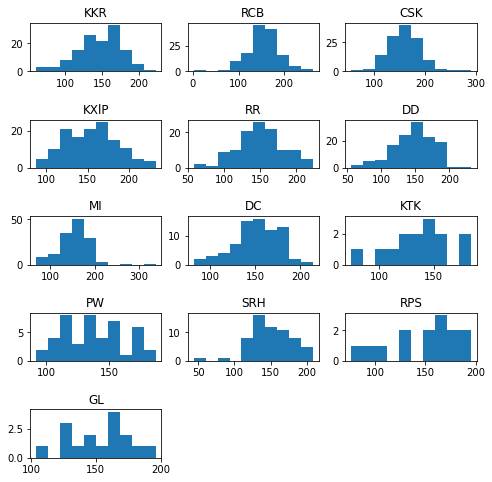

In [42]:
# Solution
#runs per match vs matches
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=1)

#KKR
kkr_info=balls[balls['Team_Batting_Id']==1]
kkr_score_details=kkr_info.groupby('Match_Id').Batsman_Scored.sum()+kkr_info.groupby('Match_Id').Extra_Runs.sum()
kkr_score_details=kkr_score_details.reset_index().rename(columns={0:'kkr_Runs'})
plt.subplot(5,3,1)
plt.hist(kkr_score_details['kkr_Runs'])
plt.title('KKR')


#RCB
rcb_info=balls[balls['Team_Batting_Id']==2]
rcb_score_details=rcb_info.groupby('Match_Id').Batsman_Scored.sum()+rcb_info.groupby('Match_Id').Extra_Runs.sum()
rcb_score_details=rcb_score_details.reset_index().rename(columns={0:'rcb_Runs'})
plt.subplot(5,3,2)
plt.hist(rcb_score_details['rcb_Runs'])
plt.title('RCB')

#CSK
csk_info=balls[balls['Team_Batting_Id']==3]
csk_score_details=csk_info.groupby('Match_Id').Batsman_Scored.sum()+csk_info.groupby('Match_Id').Extra_Runs.sum()
csk_score_details=csk_score_details.reset_index().rename(columns={0:'csk_Runs'})
plt.subplot(5,3,3)
plt.hist(csk_score_details['csk_Runs'])
plt.title('CSK')

#KXIP
kxlp_info=balls[balls['Team_Batting_Id']==4]
kxlp_score_details=kxlp_info.groupby('Match_Id').Batsman_Scored.sum()+kxlp_info.groupby('Match_Id').Extra_Runs.sum()
kxlp_score_details=kxlp_score_details.reset_index().rename(columns={0:'kxlp_Runs'})
plt.subplot(5,3,4)
plt.hist(kxlp_score_details['kxlp_Runs'])
plt.title('KXlP')

#RR
rr_info=balls[balls['Team_Batting_Id']==5]
rr_score_details=rr_info.groupby('Match_Id').Batsman_Scored.sum()+rr_info.groupby('Match_Id').Extra_Runs.sum()
rr_score_details=rr_score_details.reset_index().rename(columns={0:'rr_Runs'})
plt.subplot(5,3,5)
plt.hist(rr_score_details['rr_Runs'])
plt.title('RR')

#DD
dd_info=balls[balls['Team_Batting_Id']==6]
dd_score_details=dd_info.groupby('Match_Id').Batsman_Scored.sum()+dd_info.groupby('Match_Id').Extra_Runs.sum()
dd_score_details=dd_score_details.reset_index().rename(columns={0:'dd_Runs'})
plt.subplot(5,3,6)
plt.hist(dd_score_details['dd_Runs'])
plt.title('DD')

#MI
mi_info=balls[balls['Team_Batting_Id']==7]
mi_score_details=mi_info.groupby('Match_Id').Batsman_Scored.sum()+mi_info.groupby('Match_Id').Extra_Runs.sum()
mi_score_details=mi_score_details.reset_index().rename(columns={0:'mi_Runs'})
plt.subplot(5,3,7)
plt.hist(mi_score_details['mi_Runs'])
plt.title('MI')

#DC
dc_info=balls[balls['Team_Batting_Id']==8]
dc_score_details=dc_info.groupby('Match_Id').Batsman_Scored.sum()+dc_info.groupby('Match_Id').Extra_Runs.sum()
dc_score_details=dc_score_details.reset_index().rename(columns={0:'dc_Runs'})
plt.subplot(5,3,8)
plt.hist(dc_score_details['dc_Runs'])
plt.title('DC')

#KTK
ktk_info=balls[balls['Team_Batting_Id']==9]
ktk_score_details=ktk_info.groupby('Match_Id').Batsman_Scored.sum()+ktk_info.groupby('Match_Id').Extra_Runs.sum()
ktk_score_details=ktk_score_details.reset_index().rename(columns={0:'ktk_Runs'})
plt.subplot(5,3,9)
plt.hist(ktk_score_details['ktk_Runs'])
plt.title('KTK')

#PW
pw_info=balls[balls['Team_Batting_Id']==10]
pw_score_details=pw_info.groupby('Match_Id').Batsman_Scored.sum()+pw_info.groupby('Match_Id').Extra_Runs.sum()
pw_score_details=pw_score_details.reset_index().rename(columns={0:'pw_Runs'})
plt.subplot(5,3,10)
plt.hist(pw_score_details['pw_Runs'])
plt.title('PW')

#SRH
srh_info=balls[balls['Team_Batting_Id']==11]
srh_score_details=srh_info.groupby('Match_Id').Batsman_Scored.sum()+srh_info.groupby('Match_Id').Extra_Runs.sum()
srh_score_details=srh_score_details.reset_index().rename(columns={0:'srh_Runs'})
plt.subplot(5,3,11)
plt.hist(srh_score_details['srh_Runs'])
plt.title('SRH')


#RPS
rps_info=balls[balls['Team_Batting_Id']==12]
rps_score_details=rps_info.groupby('Match_Id').Batsman_Scored.sum()+rps_info.groupby('Match_Id').Extra_Runs.sum()
rps_score_details=rps_score_details.reset_index().rename(columns={0:'rps_Runs'})
plt.subplot(5,3,12)
plt.hist(rps_score_details['rps_Runs'])
plt.title('RPS')

#GL
gl_info=balls[balls['Team_Batting_Id']==13]
gl_score_details=gl_info.groupby('Match_Id').Batsman_Scored.sum()+gl_info.groupby('Match_Id').Extra_Runs.sum()
gl_score_details=gl_score_details.reset_index().rename(columns={0:'gl_Runs'})
plt.subplot(5,3,13)
plt.hist(gl_score_details['gl_Runs'])
plt.title('GL')


In [43]:
print('INERENCE: From the distribution plot of the runs scored per match of each team, it has been inferred that CSK teams runs/match is normally distributed')

INERENCE: From the distribution plot of the runs scored per match of each team, it has been inferred that CSK teams runs/match is normally distributed


### ----------------------------TASK 10 ----------------------------------#
##### Find the luckiest day for each team interms of win percentage

In [44]:
# Solution
# creating df with required features and day of the respective date given
match_temp=match.drop(['Match_Id','Season_Id','Venue_Name', 'Toss_Winner_Id', 'Toss_Decision', 'IS_Superover',
             'Man_Of_The_Match_Id', 'First_Umpire_Id','Second_Umpire_Id', 'City_Name','Host_Country','Is_DuckWorthLewis','Win_Type'
             ,'Won_By','IS_Result'], axis=1)
match_temp['Match_Day']=match['Match_Date'].dt.day_name()

#getting win counts of each team wrt days
luckyday=pd.DataFrame(match_temp.groupby('Match_Day').Match_Winner_Id.value_counts()).rename(columns={'Match_Winner_Id':'Matches_Wins'}).reset_index()

# getting total matches for each team wrt days
host_matches=pd.DataFrame(match_temp.groupby('Match_Day').Team_Name_Id.value_counts()).rename(columns={'Team_Name_Id':'Matches'}).reset_index()
away_matches=pd.DataFrame(match_temp.groupby('Match_Day').Opponent_Team_Id.value_counts()).rename(columns={'Opponent_Team_Id':'Matchess'}).reset_index()
total=pd.merge(host_matches,away_matches,right_on=['Match_Day','Opponent_Team_Id'],left_on=['Match_Day','Team_Name_Id'])
total['Total_Matches']=total['Matchess']+total['Matches']
total_matches=total.drop(['Matches','Opponent_Team_Id','Matchess'],axis=1)

# merging win counts and total matches for each team wrt days
luckiest_day=pd.merge(luckyday,total_matches,left_on=['Match_Day','Match_Winner_Id'],right_on=['Match_Day','Team_Name_Id'])
luckiest_day=luckiest_day.drop('Team_Name_Id',axis=1).rename(columns={'Match_Winner_Id':'Team_Id'})

# teams_day
teams_day=pd.merge(team,luckiest_day,on='Team_Id')
#teams_day=teams_day.drop(['Team_Short_Code'],axis=1)
teams_day['Winning_Percent']=(round((teams_day['Matches_Wins']/teams_day['Total_Matches'])*100,2))

# generic function
def find_lucky_day(team_id):
    team=teams_day[teams_day['Team_Id']==team_id]
    team=team.rename(columns={'Match_Day':'Luckiest_Day'})
    return(team[team['Winning_Percent']==team['Winning_Percent'].max()])
find_lucky_day(3)



,Team_Id,Team_Name,Team_Short_Code,Luckiest_Day,Matches_Wins,Total_Matches,Winning_Percent
20,3,Chennai Super Kings,CSK,Wednesday,12,17,70.59


### ----------------------------TASK 11 ----------------------------------# 
##### Is that runs scored in the power play having the impact on match result ?

In [30]:
# Solution
balls['Extra_Runs'].replace(' ',0,inplace=True)
runs_conceded=balls.groupby('Bowler_Id')['Batsman_Scored'].sum()+balls.groupby('Bowler_Id')['Extra_Runs'].sum()
powerplay_deliveries = balls[balls['Over_Id'] <=6]
powerplay_deliveries

,Match_Id,Season_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,1,2,1,2,2,2,1,14,0,,0,,,
2,335987,1,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,1,4,1,2,2,2,1,14,0,,0,,,
4,335987,1,1,1,5,1,2,2,2,1,14,0,,0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136500,981024,9,2,6,2,2,11,8,2,162,460,0,,0,,,
136501,981024,9,2,6,3,2,11,8,2,162,460,1,,0,,,
136502,981024,9,2,6,4,2,11,162,1,8,460,0,,0,,,
136503,981024,9,2,6,5,2,11,162,1,8,460,1,,0,,,


Text(0.5, 1.0, 'Impact of high scored powerplay teams in match result')

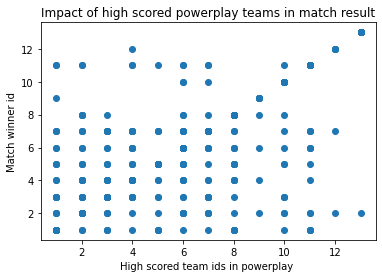

In [45]:
# powerplay score calculation for each team
pp_overs=balls[(balls['Over_Id']>0) & (balls['Over_Id']<7)]
bat_score=pp_overs.groupby(['Match_Id','Innings_Id','Team_Batting_Id']).Batsman_Scored.sum()
extras=pp_overs.groupby(['Match_Id','Innings_Id','Team_Batting_Id']).Extra_Runs.sum()
pp_score=bat_score+extras
pp_score=pp_score.reset_index().rename(columns={0:'PP_Score','Team_Batting_Id':'Team_Id'}).drop('Innings_Id',axis=1)

# pp_impact
match_winner=match[['Match_Id','Match_Winner_Id']]
pp_impact=pd.merge(pp_score,match_winner,on='Match_Id')


# powerplay_impact
powerplay_impact=pd.DataFrame()
for i in set(pp_impact['Match_Id'].to_list()):
    #pp=pp_impact[pp_impact['Match_Id']==i]
    pp_impact[pp_impact['Match_Id']==i][pp_impact[pp_impact['Match_Id']==i]['PP_Score']==pp_impact[pp_impact['Match_Id']==i]['PP_Score'].max()]
    powerplay_impact=powerplay_impact.append(pp_impact[pp_impact['Match_Id']==i][pp_impact[pp_impact['Match_Id']==i]['PP_Score']==pp_impact[pp_impact['Match_Id']==i]['PP_Score'].max()])

# PP_vs_Win
plt.scatter(powerplay_impact['Team_Id'],powerplay_impact['Match_Winner_Id'])
plt.xlabel('High scored team ids in powerplay ')
plt.ylabel('Match winner id')
plt.title('Impact of high scored powerplay teams in match result')


In [46]:
print('Inference: The plot confirms, there is a strong relationship between power play score and the match result.')

Inference: The plot confirms, there is a strong relationship between power play score and the match result.


### ----------------------------TASK 12 ----------------------------------# 
##### Is that economic rate of the bowler have an impact on their wicket taking ability ? 

CORRELATION: -0.2727536223744721


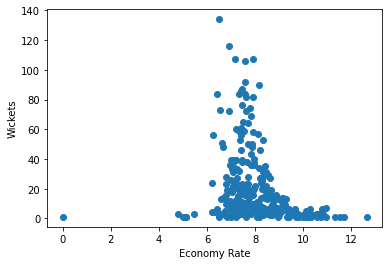

In [47]:
# Solution
# Solution
#Economy Rate
balls['Extra_Runs'].replace(' ',0,inplace=True)
runs_conceded=balls.groupby('Bowler_Id')['Batsman_Scored'].sum()+balls.groupby('Bowler_Id')['Extra_Runs'].sum()
# totall_balls_bowled
balls_bowled=balls.groupby('Bowler_Id').Ball_Id.count()
# economy_rate
economy_rate=pd.DataFrame((runs_conceded/balls_bowled)*6).rename(columns={0:'Economy'})
economy_rate=economy_rate.reset_index()
#economy_rate

#Wickets Taken
balls_temp=balls
balls_temp['Player_dissimal_Id'].replace(' ',0,inplace=True)
balls_temp=balls_temp[balls_temp['Player_dissimal_Id']>0]
bowlers_wickets=pd.DataFrame(balls_temp.groupby('Bowler_Id').Player_dissimal_Id.count()).rename(columns={'Player_dissimal_Id':'Wickets'}).reset_index()
#bowlers_wickets

#merging economy and wickets
wickets_economy=pd.merge(economy_rate,bowlers_wickets,on='Bowler_Id')

#plotting
import matplotlib.pyplot as plt
plt.scatter(wickets_economy['Economy'],wickets_economy['Wickets'])
plt.xlabel('Economy Rate')
plt.ylabel('Wickets')

# correlation
#np.corrcoef(wickets_economy['Economy'],wickets_economy['Wickets'])
print(f"CORRELATION: {wickets_economy['Economy'].corr(wickets_economy['Wickets'])}")


In [48]:
print('Inference: Both the plot and coorrelation confirms, there is no strong relationship between bowlers economy rate and the wicket taking ability.')

Inference: Both the plot and coorrelation confirms, there is no strong relationship between bowlers economy rate and the wicket taking ability.
